In [1]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
from lmfit.models import StepModel
from lmfit import  Model, Parameters

In [2]:
tps = np.arange(2175)

In [3]:
def anticipation (x, tau=0.013, xT=0.1, t_T=1, start_anti=500., a_anti=0.1, latency=1000., bino=0) :
    '''
    tau -- constante oeuil (0.013)
    xT -- position en deg de la cible (1)
    t_T -- tps du mvt - s (0.1)
    latency -- tps où commence le mvt
    bino -- binomial
    
    start_anti = debut de l'anticipation
    a_anti =  vitesse de l'anticipation
    ''' 
    
    if bino == 0:
        xT =xT*-1
    
    dt = 0.001
    T = int(t_T/dt) # tps termine mvt - ms
    time = np.arange(len(x))/1000 # en seconde !!!
    start = latency/1000
    start_anti=start_anti/1000
    
    rho = tau/t_T*np.log((1+np.exp(t_T/tau))/2) # proportion accélération dans mvt
    rhoT = int(np.round(T*rho)) # tps accélération
    Umax = 1/tau*xT/((2*rho-1)*t_T-tau*(2-np.exp(-rho*t_T/tau)-np.exp((1-rho)*t_T/tau))) # signal N
    x_max = Umax*tau*(1-np.exp(-1/tau*time[rhoT]))

    vitesse = []
    for t in range(len(time)):
        if time[t] < start_anti :
            vitesse.append(0)
        else :
            if bino==0 :
                if Umax*tau*(1-np.exp(-1/tau*(time[t]-start))) > 0 :
                    vitesse.append(((time[t]-start_anti)*a_anti))
                    x = (time[t]-start_anti)*a_anti
                else :
                    vitesse.append((Umax*tau*(1-np.exp(-1/tau*(time[t]-start)))+x))
            else :
                if Umax*tau*(1-np.exp(-1/tau*(time[t]-start))) < 0 :
                    vitesse.append(((time[t]-start_anti)*a_anti))
                    x = (time[t]-start_anti)*a_anti
                else :
                    vitesse.append((Umax*tau*(1-np.exp(-1/tau*(time[t]-start)))+x))
    return vitesse

2175


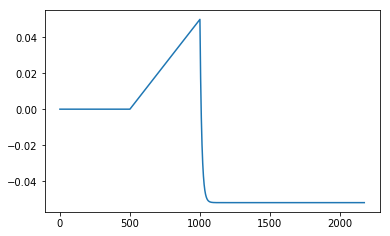

In [4]:
print(len(anticipation(tps)))
fig, ax = plt.subplots(1, 1, figsize=(6, (6/1.6180)))
plt.plot(anticipation(tps, tau=0.013, xT=0.1, t_T=1, start_anti=500., a_anti=0.1, latency=1000., bino=0))

/home/drone/.local/lib/python3.5/site-packages/lmfit/printfuncs.py:153: RuntimeWarning: invalid value encountered in double_scalars
  spercent = '({0:.2%})'.format(abs(par.stderr/par.value))


[[Model]]
    Model(anticipation)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 795
    # data points      = 2175
    # variables        = 6
    chi-square         = 0.02046163
    reduced chi-square = 9.4337e-06
    Akaike info crit   = -25161.4236
    Bayesian info crit = -25127.3149
[[Variables]]
    tau:         0.013 (fixed)
    xT:          0.03082593 +/- 0.00000000 (0.00%) (init = 0.065)
    t_T:         0.32028698 +/- 0.00000000 (0.00%) (init = 0.3)
    start_anti:  150.539253 +/- 0.00000000 (0.00%) (init = 100)
    a_anti:     -0.09995991 +/- 0.00000000 (0.00%) (init = 0.1)
    latency:     1500.00000 +/- 0.00000000 (0.00%) (init = 1000)
    debut:       0.00000000 +/- 0.00000000 (nan%) (init = 0)
    bino:        0 (fixed)



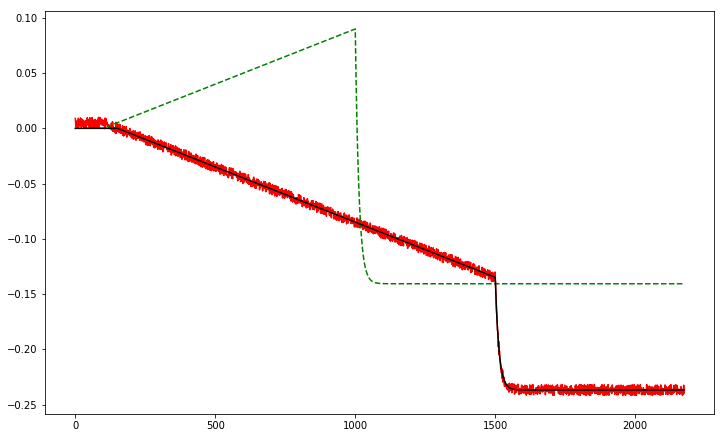

In [5]:
test = anticipation(tps, tau=0.013, xT=0.1, t_T=1, start_anti=100., a_anti=-0.1, latency=1500., bino=0)+np.random.rand(len(tps))*0.01

model = Model(anticipation)

params = Parameters()
params.add('tau', value=0.013, vary=False)#, min=0, max=0.05)
params.add('xT', value=0.065, min=0, max=1)
params.add('t_T', value= 0.3, min=0, max=1)
params.add('start_anti', value=100., min=0, max=1000)
params.add('a_anti', value=0.1, min=-1, max=1)
params.add('latency', value=1000., min=0, max=1500)
params.add('debut', value=0., min=-100, max=100)
params.add('bino', value=0, vary=False)

result = model.fit(test, params, x=tps)


fig, ax = plt.subplots(1, 1, figsize=(12, (12/1.6180)))
ax.plot(tps, test, 'r')
ax.plot(tps, result.init_fit, 'g--')
ax.plot(tps, result.best_fit, 'k')

print(result.fit_report())